# Goal

Analyze US adult income to see if there is any relationship between obtaining a college degree equates to 

In [2]:
#Import needed packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#Uploading & Reading data into DF

ad_data = pd.read_csv('adult.csv')

In [4]:
#Printing 10 rows of data to see if there are any missing values

ad_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
#Replacing missing values
ad_data = ad_data.replace('?', np.nan)

In [6]:
#Checking if replacement occured
ad_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [9]:
#Checking for missing values

ad_data.isnull().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     583
age                  0
fnlwgt               0
education            0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [10]:
#Analying data

ad_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Both 'workclass' and 'occupation' have data that are close in numbers, therefore similar. On the other hand, 'native-country' is missing alot of values, indicating that there are missing columns that either need to be deleted or replaced


Text(0, 0.5, 'Number of people')

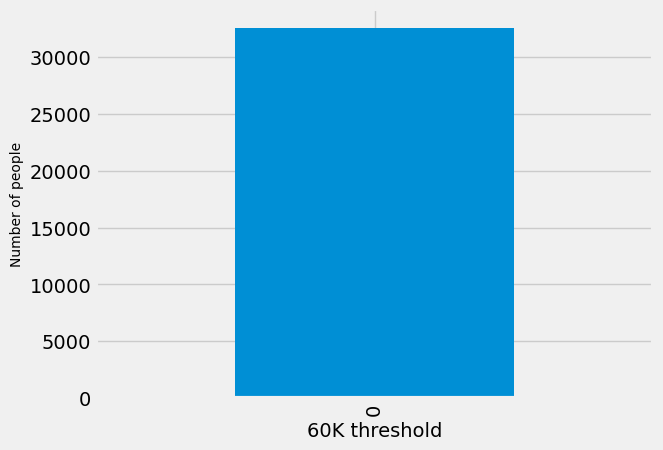

In [23]:
# Create a binary column to indicate wheather a person earns more than 60K or not

ad_data['60K_threshold'] = ad_data.apply(lambda x: 1 if x['income'] == '>60K' else 0, axis=1)

# Plot the count of people meeting the 60K income threshold criteria or not
ad_data['60K_threshold'].value_counts().plot(kind='bar')
plt.xlabel('60K threshold', fontsize=14)
plt.ylabel('Number of people', fontsize=10)

Looking at this bar graph, it shows that almost of the people who do not meet the 60K threshold income, which is alittle worrying

Text(0, 0.5, 'Number of people')

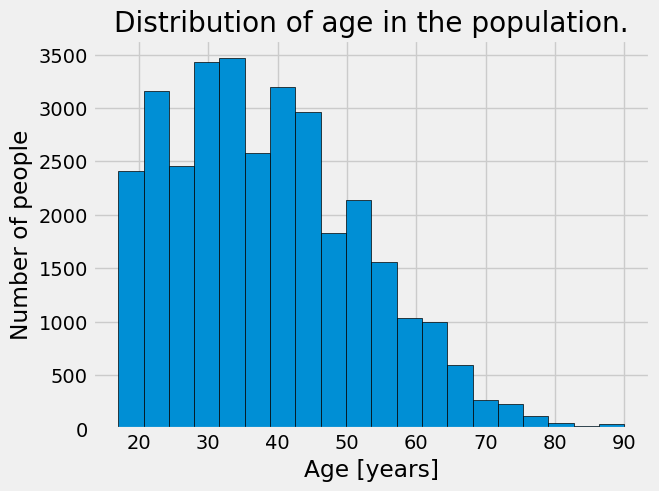

In [24]:
# Plot the income based on age bracket

plt.style.use('fivethirtyeight')

plt.hist(ad_data['age'], edgecolor = 'k', bins = 20)
plt.title('Distribution of age in the population.') 
plt.xlabel('Age [years]')
plt.ylabel('Number of people')

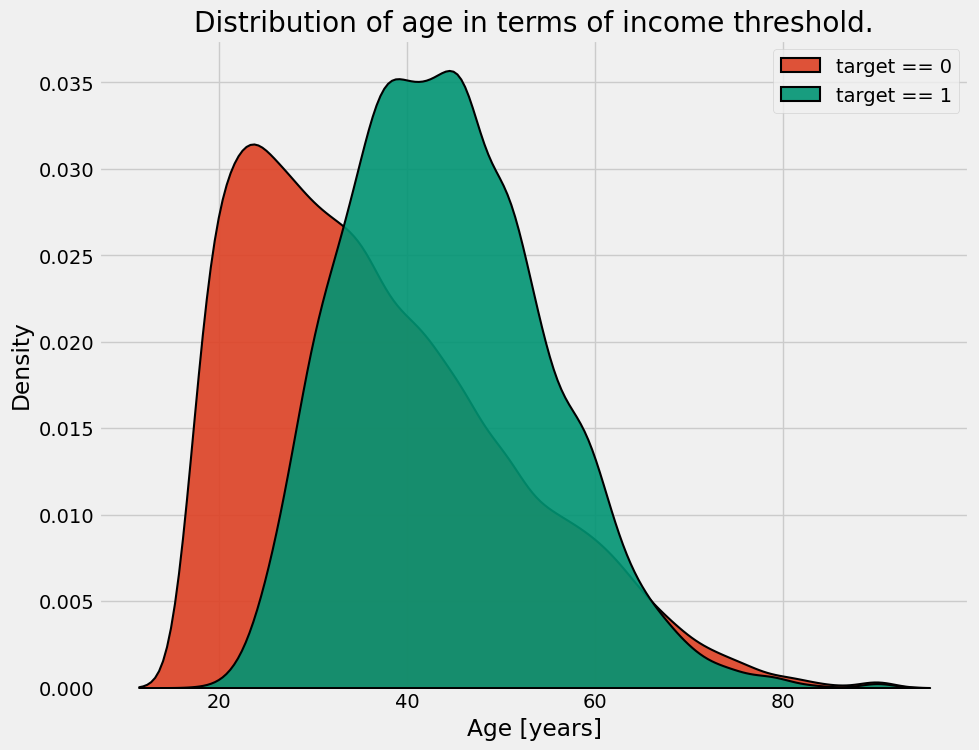

In [28]:
# colours
low_c = '#dd4124'
high_c = '#009473'

plt.figure(figsize = (10, 8))

sns.kdeplot(ad_data.loc[ad_data['50K_threshold'] == 0, 'age'], label = 'target == 0', color=low_c, ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3)
sns.kdeplot(ad_data.loc[ad_data['50K_threshold'] == 1, 'age'], label = 'target == 1', color=high_c, ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3)

plt.xlabel('Age [years]')
plt.ylabel('Density')
plt.title('Distribution of age in terms of income threshold.')
plt.legend()

Changing the threshold from 60K to 50K, gave a better indication and proof of of our assumption, which is, one can assume that the majority of the those who have an income of 60K or less are individuals in all the age groups with the exception of individuals in their mid thirties and fourties

Text(0, 0.5, 'Income above 50K in percentage')

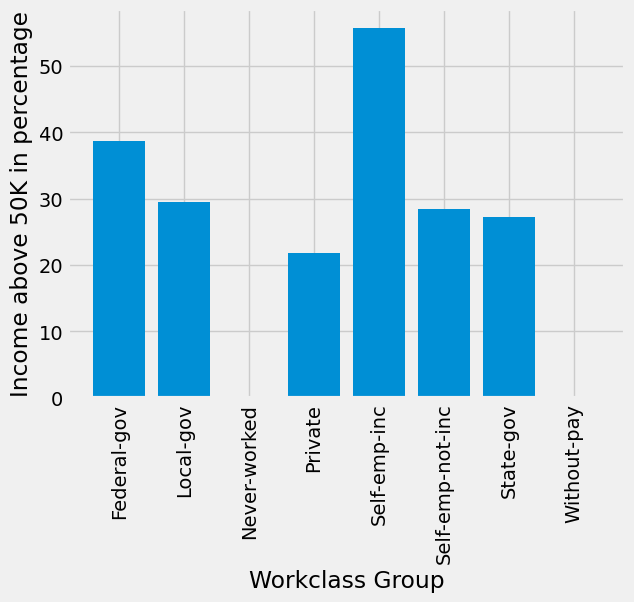

In [30]:
#Graphing data by workclass for 50K threshold instead of 60K due to lack of data
workclass_groups  = ad_data.groupby('workclass').mean()
plt.bar(workclass_groups.index.astype(str), 100 * workclass_groups['50K_threshold'])
plt.xticks(rotation = 90)
plt.xlabel('Workclass Group')
plt.ylabel('Income above 50K in percentage')


Looking at this graph, one can see that there are no individuals, irregardless of their age group that has never worked. Most of the people who earn above the 50K threshold are those wo are self employed( over 50%). second most people are those who work for the federal government, whoic are approximately 40%. 

/Users/ABBY/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

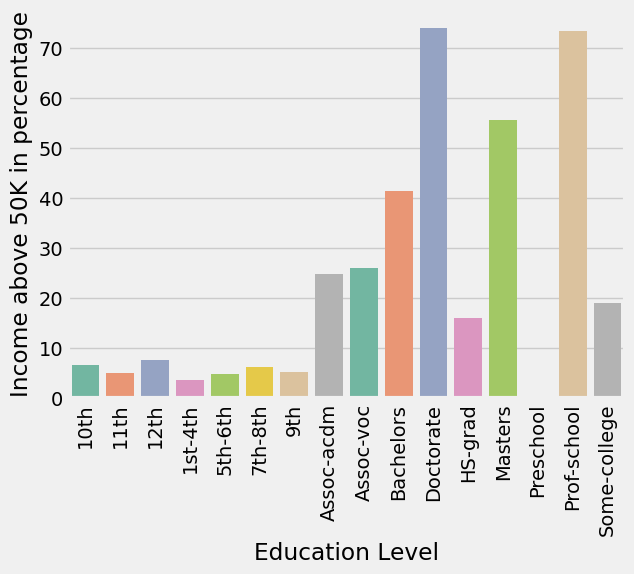

In [32]:
#Grouping data by educaiton, to see if there is a correlation.
education_groups  = ad_data.groupby('education').mean()
sns.barplot(education_groups.index.astype(str), 100 * education_groups['50K_threshold'], palette='Set2')
plt.xticks(rotation = 90)
plt.xlabel('Education Level')
plt.ylabel('Income above 50K in percentage')


Based on this graph, one can see that the high income earners are those with post-high school education level. For example, those with doctorates, and those individuals who went to professional school. 

/Users/ABBY/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

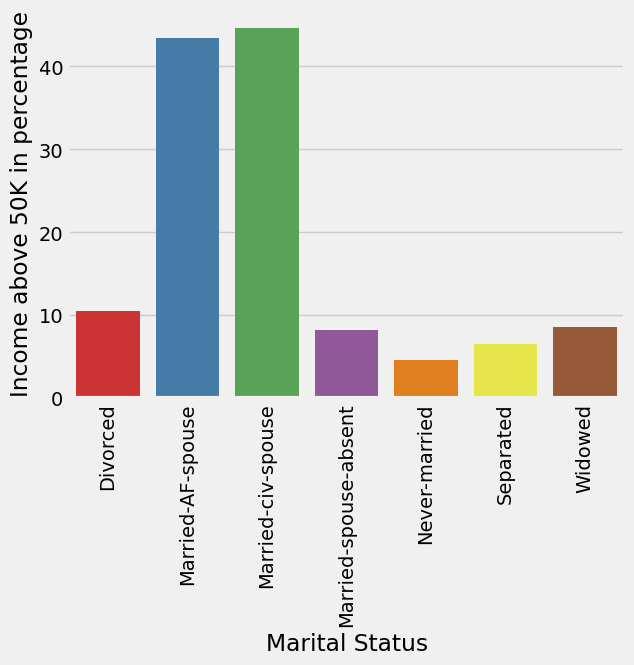

In [35]:
#Grouping data by marital status to see if there is any correlation with both income and education level
marital_groups  = ad_data.groupby('marital.status').mean()
sns.barplot(marital_groups.index.astype(str), 100 * marital_groups['50K_threshold'], palette='Set1')
plt.xticks(rotation = 90)
plt.xlabel('Marital Status')
plt.ylabel('Income above 50K in percentage')

Marital status is correlated with high income earners. thos wo are married, have an income that is above 50K, which may indicate that one or both of the spouses have a college degree or higher. 